In [89]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler


In [90]:
df= pd.read_csv("/content/diabetes.csv")

In [91]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [93]:
df.drop_duplicates()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [94]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [95]:
df["Outcome"].value_counts()

,count
Outcome,
0,500
1,268


In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
corr = df.corr()


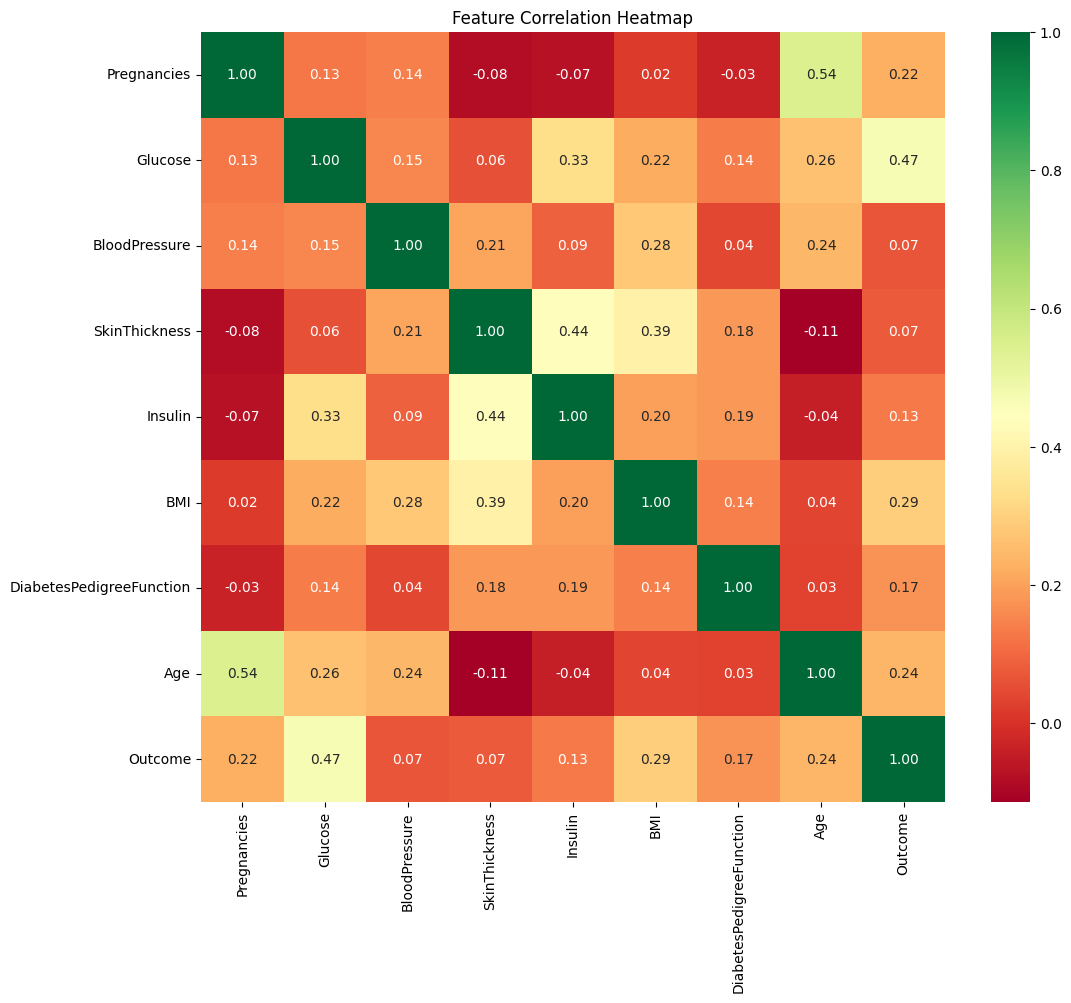

In [98]:
plt.figure(figsize=(12, 10))
# 'annot=True' puts the actual numbers inside the squares
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [99]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]


In [100]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42,stratify=y
)


In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix



In [103]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


In [104]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    random_state=42
)
rf.fit(X_train_res, y_train_res)


RandomForestClassifier(n_estimators=200, random_state=42)

In [105]:
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1]


In [106]:
cm = confusion_matrix(y_test, y_pred)


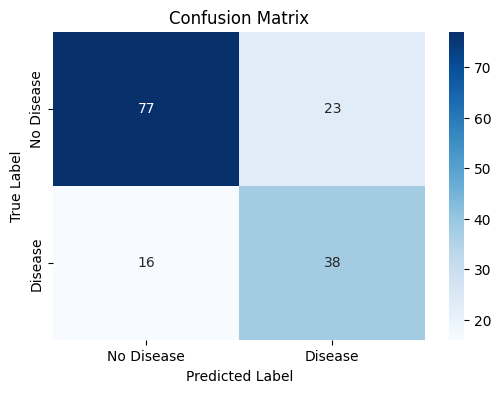

In [107]:
plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Disease","Disease"],
    yticklabels=["No Disease","Disease"]
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [108]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Random Forest Accuracy: 74.68%
Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       100
           1       0.62      0.70      0.66        54

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [109]:
joblib.dump(rf, "risk_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

for recovery analysis

In [110]:
df_risk = df[df["Outcome"] == 1].copy()
df_risk["RecoveryDays"] = (
    5
    + 0.04 * df_risk["Glucose"]
    + 0.6  * df_risk["BMI"]
    + 0.03 * df_risk["Age"]
)



In [111]:
X_reg = df_risk.drop(["Outcome", "RecoveryDays"], axis=1)
y_reg = df_risk["RecoveryDays"]


In [112]:
X_reg_scaled = scaler.transform(X_reg)


In [113]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reg_scaled, y_reg, test_size=0.2, random_state=42
)



In [114]:
reg = LinearRegression()
reg.fit(Xr_train, yr_train)


LinearRegression()

In [115]:
mae = mean_absolute_error(yr_test, reg.predict(Xr_test))
print("Recovery MAE:", mae)


Recovery MAE: 2.500057773970723e-15


In [116]:
joblib.dump(reg, "recovery_model.pkl")

['recovery_model.pkl']

In [117]:
!pip install streamlit

In [118]:
import streamlit as st
import joblib
import numpy as np
import shap



In [119]:
risk_model = joblib.load("risk_model.pkl")
recovery_model = joblib.load("recovery_model.pkl")
scaler = joblib.load("scaler.pkl")


In [120]:
st.title("Healthcare Decision Support System")


2026-01-17 10:42:58.663 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-17 10:42:58.666 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-17 10:42:58.668 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [121]:
st.write("Predict disease risk and recovery time using ML")


2026-01-17 10:42:58.683 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-17 10:42:58.685 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-17 10:42:58.686 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [122]:
features = []
labels = [
    "Pregnancies", "Glucose", "BloodPressure",
    "SkinThickness", "Insulin", "BMI",
    "DiabetesPedigreeFunction", "Age"
]

In [123]:
for label in labels:
    value = st.number_input(label, 0.0)
    features.append(value)
if st.button("Predict"):
    X = np.array(features).reshape(1, -1)
    X_scaled = scaler.transform(X)

    # Calculate risk and probability
    risk_prob = risk_model.predict_proba(X_scaled)[0][1]
    risk = risk_model.predict(X_scaled)[0]

    st.subheader("Results")

    # Move this logic INSIDE the button block
    if risk == 1:
        st.error(f"High Risk Detected (Probability: {risk_prob:.2f})")

        # This predicts the recovery time using your model
        recovery_days = recovery_model.predict(X_scaled)[0]
        st.success(f"Estimated Time to Glucose Stabilization: {int(recovery_days)} days")

    else:
        st.success(f"Low Risk (Probability: {risk_prob:.2f})")

2026-01-17 10:42:58.701 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-17 10:42:58.703 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-17 10:42:58.704 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-17 10:42:58.705 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-17 10:42:58.706 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-17 10:42:58.707 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-17 10:42:58.708 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-17 10:42:58.708 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [124]:
explainer = shap.TreeExplainer(risk_model)

In [125]:
shap_values = explainer(X_scaled, check_additivity=False)

In [126]:
st.subheader("Model Explanation")

2026-01-17 10:43:13.518 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-17 10:43:13.524 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-17 10:43:13.530 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

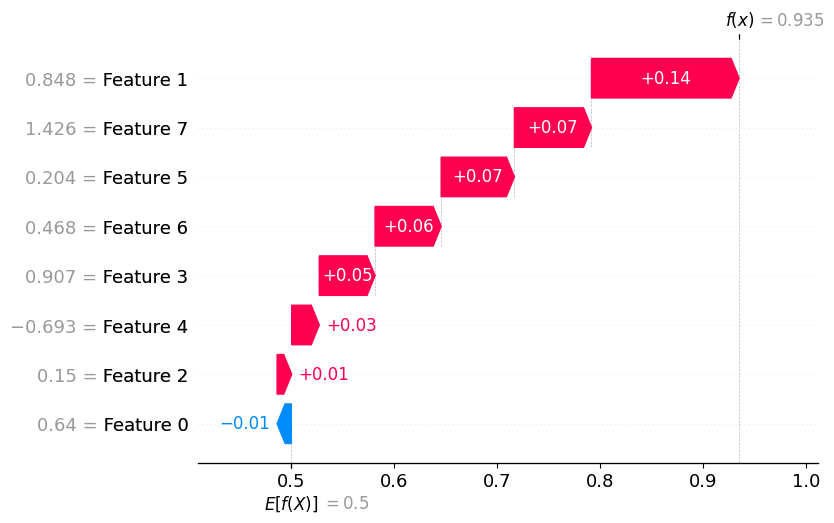

2026-01-17 10:43:14.448 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-17 10:43:15.051 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-17 10:43:15.053 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-17 10:43:15.054 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [127]:
fig = plt.figure()
shap.plots.waterfall(shap_values[0][:, 1])
st.pyplot(fig)

In [128]:
!pip install streamlit shap pyngrok joblib scikit-learn


In [129]:
!pip install langchain-groq

In [130]:
%%writefile app.py
import streamlit as st
import joblib
import numpy as np
import shap
import matplotlib.pyplot as plt

# LangChain Gemini
from langchain_groq import ChatGroq
from langchain_core.messages import HumanMessage
# -------------------- CONFIG --------------------
st.set_page_config(page_title="Health DSS", layout="wide")

# ⚠️ Use st.secrets["GEMINI_API_KEY"] in production
GROQ_API_KEY = ("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")


llm = ChatGroq(
    api_key=GROQ_API_KEY,
    model="llama-3.3-70b-versatile", # or: "mixtral-8x7b-32768"
    temperature=0.3,
max_tokens=1000,
)
# -------------------- LOAD MODELS --------------------
try:
    risk_model = joblib.load("risk_model.pkl")
    stabilization_model = joblib.load("recovery_model.pkl")
    scaler = joblib.load("scaler.pkl")
except FileNotFoundError:
    st.error("Model files not found. Please ensure .pkl files are in the directory.")
    st.stop()

# -------------------- AI FUNCTION --------------------
def get_ai_report(vitals, risk_label, days=None):
    try:
        if risk_label == "High":
            prompt = f"""
You are a clinical decision support AI.

Patient has HIGH diabetes risk.
Estimated glucose stabilization time: {days} days.

Patient vitals:
{vitals}

Provide:
1. Key contributing risk factors
2. 3 medical precautions
3. 3 lifestyle recommendations
"""
        else:
            prompt = f"""
You are a preventive healthcare AI.

Patient has LOW diabetes risk.

Patient vitals:
{vitals}

Provide:
1. Preventive healthcare advice
2. Future risk factors to monitor
"""

        response = llm.invoke(
            [HumanMessage(content=prompt)]
        )

        return response.content

    except Exception as e:
        return f"AI clinical explanation unavailable: {str(e)}"

# -------------------- UI --------------------
st.title("🏥 Healthcare Decision Support System + GenAI")
st.markdown("---")

st.sidebar.header("Patient Vitals")

inputs = {}
inputs["Pregnancies"] = st.sidebar.number_input("Pregnancies", 0, 20, 0)
inputs["Glucose"] = st.sidebar.number_input("Glucose", 0, 300, 100)
inputs["BloodPressure"] = st.sidebar.number_input("Blood Pressure", 0, 200, 80)
inputs["SkinThickness"] = st.sidebar.number_input("Skin Thickness", 0, 100, 20)
inputs["Insulin"] = st.sidebar.number_input("Insulin", 0, 900, 80)
inputs["BMI"] = st.sidebar.number_input("BMI", 0.0, 70.0, 25.0)
inputs["DiabetesPedigreeFunction"] = st.sidebar.number_input("Pedigree Function", 0.0, 3.0, 0.5)
inputs["Age"] = st.sidebar.number_input("Age", 0, 120, 30)

# -------------------- RUN DIAGNOSTIC --------------------
if st.sidebar.button("Run Diagnostic"):

    feature_order = [
        "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
        "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"
    ]

    X = np.array([inputs[f] for f in feature_order]).reshape(1, -1)
    X_scaled = scaler.transform(X)

    risk_prob = risk_model.predict_proba(X_scaled)[0][1]
    risk_label = "High" if risk_prob >= 0.5 else "Low"

    col1, col2 = st.columns([1, 1.2])

    # -------------------- COLUMN 1: ML OUTPUT --------------------
    with col1:
        st.subheader("Predictive Results")

        if risk_label == "High":
            st.error(f"**Risk Level: HIGH** (Probability: {risk_prob:.2%})")
            days_pred = int(stabilization_model.predict(X_scaled)[0])
            st.warning(f"**Estimated Glucose Stabilization:** {days_pred} days")
        else:
            st.success(f"**Risk Level: LOW** (Probability: {risk_prob:.2%})")
            days_pred = None

        st.markdown("---")
        st.subheader("Feature Contribution (SHAP)")

        explainer = shap.Explainer(risk_model)
        shap_values = explainer(X_scaled)

        fig, ax = plt.subplots(figsize=(8, 4))
        shap.plots.waterfall(shap_values[0, :, 1], show=False)
        st.pyplot(fig)
        plt.close()

    # -------------------- COLUMN 2: GEN-AI OUTPUT --------------------
    with col2:
        st.subheader("Gen-AI Clinical Insight")
        with st.spinner("Analyzing patient profile..."):
            report = get_ai_report(inputs, risk_label, days_pred)
            st.markdown(report)

# -------------------- FOOTER --------------------
st.markdown("---")
st.caption(
    "**Disclaimer:** This tool is for decision support only. "
    "Predictions are generated by machine learning models and must be validated by a certified medical professional."
)

Overwriting app.py


In [131]:
!pkill streamlit
!pkill ngrok

In [132]:
# 1. Update the library to ensure stable v1 API support
!pip install -U google-generativeai shap pyngrok

from pyngrok import ngrok
import os

# 2. Kill all background processes to reset tunnels
!pkill -9 ngrok

# 3. Clean start
ngrok.set_auth_token("38FH6uOUaewOl28RAWwVA0KAIz7_5Q4oKpHYMQhvFDccy9sS4")

# 4. Launch Streamlit
!streamlit run app.py &>/content/logs.txt &

# 5. Connect and get the new URL
public_url = ngrok.connect(8501)
print(f"✅ Your App is Live: {public_url.public_url}")

✅ Your App is Live: https://farouche-kory-electrotonic.ngrok-free.dev
